# 🧠 Clustering Algorithm Comparison
This notebook demonstrates and compares different unsupervised clustering algorithms using synthetic datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set(style='whitegrid')


## 🔧 Generate Sample Datasets

In [2]:
# Generate blob and moon datasets
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize data for DBSCAN and GMM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_blobs_scaled = scaler.fit_transform(X_blobs)
X_moons_scaled = scaler.fit_transform(X_moons)


In [3]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=30)
    plt.title(title)
    plt.show()


## 📌 K-Means Clustering

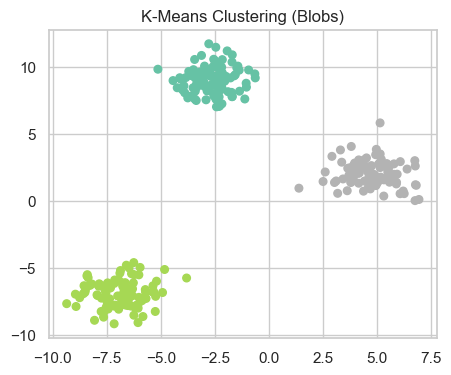

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_blobs)
plot_clusters(X_blobs, kmeans_labels, "K-Means Clustering (Blobs)")


**Explanation**:  
K-Means forms **spherical clusters** by assigning each point to the **nearest cluster centroid** and updating those centroids iteratively.  
In this blob dataset, the clusters are well-separated and circular, so K-Means performs very well.  
However, it struggles with **non-circular shapes** or clusters with **varying densities**.

## 🌌 DBSCAN Clustering

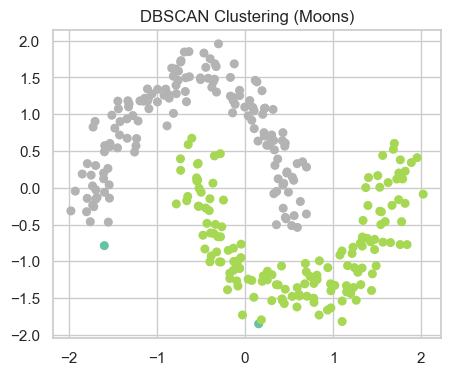

In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_moons_scaled)
plot_clusters(X_moons_scaled, dbscan_labels, "DBSCAN Clustering (Moons)")


**Explanation**:  
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are **densely packed** together using two parameters:  
- `eps`: the neighborhood radius  
- `min_samples`: minimum number of points to form a dense region

It handles **irregular shapes**, like these moons, very well and can also identify **outliers** as noise (labeled `-1`).  
This makes it great for real-world messy data.

## 🌳 Hierarchical Clustering

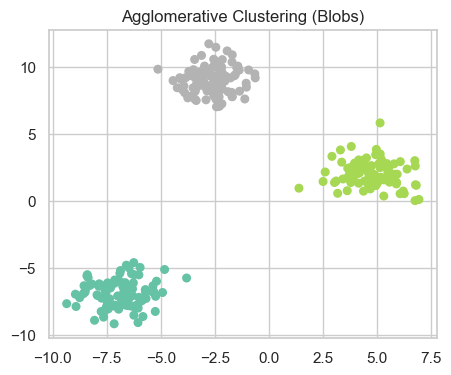

In [6]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hier_labels = hierarchical.fit_predict(X_blobs)
plot_clusters(X_blobs, hier_labels, "Agglomerative Clustering (Blobs)")


**Explanation**:  
Agglomerative clustering is a **hierarchical method** that builds a cluster tree by **merging the closest pairs** of clusters at each step.  
Here, on a blob dataset, the result looks similar to K-Means because of the data’s shape.  
But hierarchical clustering is more flexible and can be adapted to handle more complex structures with the right linkage method (e.g., average, complete, ward).

## 📊 Gaussian Mixture Model (GMM)

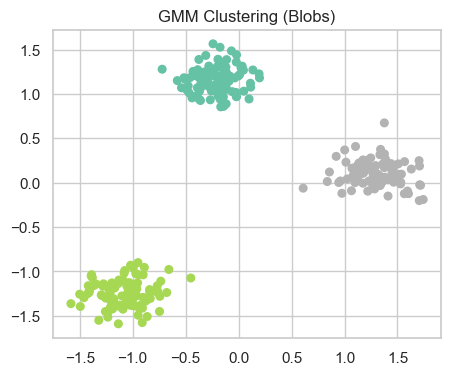

In [7]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_blobs_scaled)
plot_clusters(X_blobs_scaled, gmm_labels, "GMM Clustering (Blobs)")


**Explanation**:  
Gaussian Mixture Models (GMM) assume the data comes from a combination of **multiple Gaussian distributions**.  
They use the **Expectation-Maximization (EM)** algorithm to estimate the best parameters.

Unlike K-Means, GMM performs **soft clustering**, meaning each point gets a **probability** of belonging to each cluster.  
It also handles **elliptical clusters** and overlapping regions better.

## 📋 Summary of Algorithms

| Algorithm        | Needs `k`? | Handles Noise | Handles Complex Shapes | Soft Clustering |
|------------------|------------|----------------|--------------------------|------------------|
| K-Means          | ✅         | ❌             | ❌                       | ❌               |
| DBSCAN           | ❌         | ✅             | ✅                       | ❌               |
| Agglomerative    | ✅         | ❌             | ✅                       | ❌               |
| GMM              | ✅         | ❌             | ✅ (elliptical)          | ✅               |
